# Базовый уровень 1.Аналоги np.linspace

In [1]:
from __future__ import division
import numpy as np

def my_linspace1(start,stop,num):
    start=float(start)
    stop=float(stop)
    
    step=(stop-start)/float(num-1)
    answer_list=[]
    for i in xrange(0,int(num)):
        answer_list.append(start+i*step)
    return np.array(answer_list)


def my_linspace2(start,stop,num):
    start=float(start)
    stop=float(stop)
    
    return np.array([start+i*(stop-start)/float(num-1) for i in xrange(0,int(num))])


### Замеры времени выполнения. (numpy показывает сравнимую эффективность)

In [46]:
start,stop,step=(100,200,30)

In [47]:
%timeit my_linspace1(start,stop,step)

100000 loops, best of 3: 15.5 µs per loop


In [48]:
%timeit my_linspace2(start,stop,step)

10000 loops, best of 3: 20.2 µs per loop


In [49]:
%timeit np.linspace(start,stop,step)

The slowest run took 4.79 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 17.6 µs per loop


### Среднее время выполнения линейно зависит от числа шагов разбиения для функций написанных через циклы и генераторы и не зависит от числа шагов разбиения для встроенной функции numpy

In [6]:
import time
import matplotlib.pyplot as plt

#----------------------------------------------
# функция для замера среднего времени пробега
#----------------------------------------------
def avg_time_of_running(function,args,n_runnings):
#     время одного пробега функции
    def time_of_running(function,args,n_runnings):
        start_time=time.clock()
        function(*args)
        end_time=time.clock()
        return (end_time-start_time)
    #     среднее время пробега в выборке (число пробегов = n_runnings)
    result_list=[]
    for i in xrange(1,n_runnings):
        result_list.append(time_of_running(function,args,n_runnings))
    return sum(result_list)/float(len(result_list))

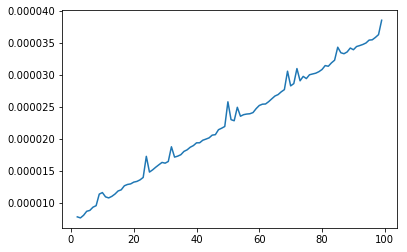

In [7]:
# зависимость от числа шагов для my_linspace1
time_list=[ avg_time_of_running(my_linspace1,(start,stop,n),1000)  for n in xrange(2,100)] 

plt.plot(range(2,100),time_list)
plt.show()

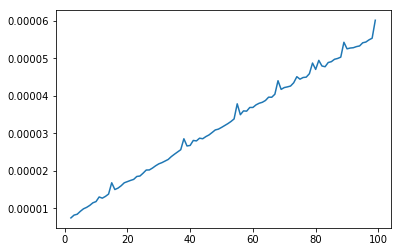

In [8]:
# зависимость от числа шагов для my_linspace2
time_list=[ avg_time_of_running(my_linspace2,(start,stop,n),1000)  for n in xrange(2,100)] 

plt.plot(range(2,100),time_list)
plt.show()

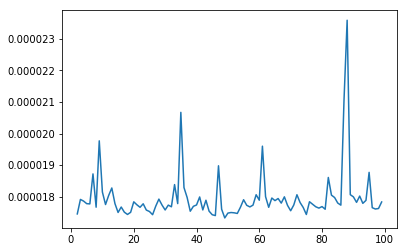

In [9]:
# зависимость от числа шагов для np.linspace
time_list=[ avg_time_of_running(np.linspace,(start,stop,n),1000)  for n in xrange(2,100)] 

plt.plot(range(2,100),time_list)
plt.show()

###  Тестирование написанных функций (при положительном шаге>1 и при положительных значениях 
###   start и stop). 
#### Тесты показывают, что полученные массивы не отличаются по форме, а отличие элементов массивов по значению не превышает 0.001.

In [10]:
#тестирование функций
import random

def test_1(start,stop,num):
    if np.array_equal(my_linspace1(start,stop,num),my_linspace2(start,stop,num)) and np.array_equal(np.linspace(start,stop,num),my_linspace1(start,stop,num)):
        return True
    else:
        return False
    
def test_2(start,stop,num):
    def compare(i):
        if abs(i[0]-i[1])>0.001:
            return False
        elif abs(i[1]-i[2])>0.001:
            return False
        else:
            return True    
    
    return all([compare (i) for i in zip(my_linspace1(start,stop,num),my_linspace2(start,stop,num),np.linspace(start,stop,num))])
    
    
    
for i in xrange(0,10):
    start1=random.randint(100,200)
    stop1=start1+random.randint(2,100)
    num1=random.randint(2,60)
#     print test_1(start1,stop1,num1)
#     print '------------------'
    print test_2(start1,stop1,num1)
#     print my_linspace1(start1,stop1,num1)
#     print my_linspace2(start1,stop1,num1)
#     print np.linspace(start1,stop1,num1)
    

True
True
True
True
True
True
True
True
True
True


#### Элементы в написанных функциях могут отличатся от np.linspace в 13-м знаке после запятой

In [11]:
start=16
stop=20
num=29

a=np.linspace(start,stop,num,endpoint=True,dtype=float)[18]
b=my_linspace2(start,stop,num)[18]

print a==b
print format(a, '.15f')
print format(b, '.15f')


False
18.571428571428569
18.571428571428573


# Базовый уровень 2.Сравнение по производительности основных операций над массивами

#### операции суммирования элементов показывают худшую производительность в numpy, чем в обычных списках

In [12]:
import numpy as np

num_elements=10000

a=np.arange(num_elements)
b=range(num_elements)

In [13]:
%timeit sum(a)

100 loops, best of 3: 2.4 ms per loop


In [14]:
%timeit sum(b)

10000 loops, best of 3: 108 µs per loop


#### Операция поэлементного умножения существенно быстрее в numpy, чем в стандартном Python

In [15]:
%timeit 10*a

The slowest run took 4.20 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 15.7 µs per loop


In [16]:
%timeit [i * 10 for i in b]

1000 loops, best of 3: 1.05 ms per loop


In [17]:
%timeit map(lambda x: x*10,b)

100 loops, best of 3: 2.27 ms per loop


In [18]:
%timeit [x*10 for x in b]

1000 loops, best of 3: 1.06 ms per loop


#### Операция сортировки также быстрее в numpy

In [19]:
%timeit np.sort(a)

10000 loops, best of 3: 152 µs per loop


In [20]:
%timeit b.sort()

1000 loops, best of 3: 282 µs per loop


# Базовый уровень 3. Выбрать метод оптимизации в scipy.optimize.

#### Шаг1. Определим функцию

3.0


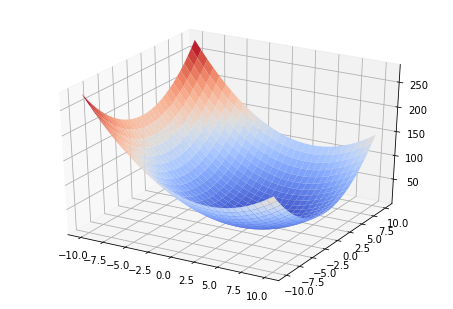

In [21]:
from scipy import optimize
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pylab import meshgrid
from matplotlib import cm


def f(x):
    return (x[0] - 3.2) ** 2 + (x[1] - 0.1) ** 2 + 3

print f([3.2, 0.1])

# график функции
x,y = meshgrid(np.linspace(-10,10,30), np.linspace(-10,10,30))
z=f([x,y])

ax = Axes3D(plt.figure())
ax.plot_surface(x,y,z,cmap=cm.coolwarm)
plt.show()

#### Шаг2. Попробуем каждый метод вычисления минимума функции и найдем число вычисления функции для него

In [22]:
number_of_function_calculations=[]
for meth in ['Nelder-Mead','Powell','CG','BFGS','Newton-CG','L-BFGS-B','TNC','COBYLA','SLSQP','dogleg','trust-ncg']:
    try:
        number_of_function_calculations.append((optimize.minimize(f, [5, 5],method=meth).nfev,meth))
    except ValueError as Ve:
        number_of_function_calculations.append((Ve,meth))
number_of_function_calculations

[(87, 'Nelder-Mead'),
 (92, 'Powell'),
 (20, 'CG'),
 (16, 'BFGS'),
 (ValueError('Jacobian is required for Newton-CG method'), 'Newton-CG'),
 (9, 'L-BFGS-B'),
 (22, 'TNC'),
 (47, 'COBYLA'),
 (9, 'SLSQP'),
 (ValueError('Jacobian is required for dogleg minimization'), 'dogleg'),
 (ValueError('Jacobian is required for Newton-CG trust-region minimization'),
  'trust-ncg')]

#### Шаг3. Отсортируем все методы начиная с метода требующего наименьшего количества вычислений функции

In [23]:
number_of_function_calculations=sorted(number_of_function_calculations,key=lambda x:x[0])
number_of_function_calculations

[(9, 'L-BFGS-B'),
 (9, 'SLSQP'),
 (16, 'BFGS'),
 (20, 'CG'),
 (22, 'TNC'),
 (47, 'COBYLA'),
 (87, 'Nelder-Mead'),
 (92, 'Powell'),
 (ValueError('Jacobian is required for Newton-CG method'), 'Newton-CG'),
 (ValueError('Jacobian is required for dogleg minimization'), 'dogleg'),
 (ValueError('Jacobian is required for Newton-CG trust-region minimization'),
  'trust-ncg')]

#### Шаг4. Используем первый метод оптимизации из полученного списка  (если два метода используют одинаковое число вычислений, то выберем в алфавитном порядке)

In [24]:
x_min = optimize.minimize(f, [5, 5],method=number_of_function_calculations[0][1])
print x_min

      fun: 3.0000000000006546
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([  4.88498131e-07,  -1.55431223e-06])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 9
      nit: 2
   status: 0
  success: True
        x: array([ 3.20000025,  0.09999923])


# Продвинутый уровень. Sklearn

#### Шаг 1. Повтор лекции. Логистическая регрессия.

In [25]:
import sklearn
import pandas as pd

dataset = pd.read_excel("credit_data.xlsx", header=1)

In [26]:
dataset.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [27]:
labels = dataset['default payment next month']
dataset.drop(['default payment next month'], axis=1, inplace=True)
dataset.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,20000,2,2,1,24,2,2,-1,-1,...,689,0,0,0,0,689,0,0,0,0
1,2,120000,2,2,2,26,-1,2,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,3,90000,2,2,2,34,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000


In [28]:
from sklearn.cross_validation import train_test_split
train_X, test_X, train_y, test_y = train_test_split(dataset, labels, test_size=0.25, random_state=42)

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [29]:
print len(train_X), len(test_X)

22500 7500


In [30]:
from sklearn.linear_model import LogisticRegression

predictive_model = LogisticRegression()
predictive_model.fit(train_X, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [31]:
predictions = predictive_model.predict(test_X)
print predictions

[0 0 0 ..., 0 0 0]


#### Шаг 2. Использование model selection.

In [32]:
sklearn.__version__

'0.18.1'

In [33]:
train_X, test_X,train_y, test_y= sklearn.model_selection.train_test_split(dataset,labels,test_size=0.2,random_state=42)

In [34]:
print len(train_y), len(test_y)

24000 6000


In [35]:
from sklearn.linear_model import LogisticRegression

predictive_model = LogisticRegression()
predictive_model.fit(train_X, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [36]:
predictions = predictive_model.predict(test_X)

In [37]:
print predictions,sum(predictions)

[0 0 0 ..., 0 0 0] 0


In [38]:
from sklearn.metrics import accuracy_score

print accuracy_score(predictions, test_y)

0.781166666667


## Сложный уровень. Рассмотреть модуль.

### Рассмотрим модуль bokeh - использующийся для создания интерактивных графиков, которые можно "зашивать" в HTML страницу.

#### Шаг 1. Возьмем набор данных их файла credit_data.

In [39]:
import sklearn
import pandas as pd

credit_data=pd.read_excel("credit_data.xlsx", header=1)

In [40]:
pd.set_option('display.max_columns',50)
credit_data.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


#### Создадим масштабируемый Scatter plot, чтобы рассмотреть "выбросы" во множестве данных.
#### (в github-представлении графики могут не отображаться)

In [41]:
from bokeh.charts import Scatter,output_notebook,show

p=Scatter(credit_data.sample(10000),x='AGE',title=u'Зависимость кредита от возраста',y='LIMIT_BAL',xlabel='AGE',ylabel='LIMIT_BAL')
output_notebook()
show(p)

Loading BokehJS ...

#### Построим гистограмму по сумме кредита
#### (в github-представлении графики могут не отображаться)

In [42]:
from bokeh.charts import Histogram, output_notebook, show

p=hist = Histogram(credit_data, values='LIMIT_BAL', title=u'Сумма кредита', plot_width=800,plot_height=400)
output_notebook()
show(p)

Loading BokehJS ...

#### Шаг 2. Построим графики количества мужчин и женщин, разбитых по семейному положению. И построим график процента возврата долгов для каждой категории.
#### (в github-представлении графики могут не отображаться)

In [43]:
import sklearn
import pandas as pd
import seaborn
import statsmodels
from bokeh.charts import Bar, output_notebook, show
from bokeh.layouts import row

df2=pd.DataFrame({'share_of_payed':credit_data.groupby(['SEX','MARRIAGE'])['default payment next month'].mean()}).reset_index()
df2=df2.loc[df2['MARRIAGE']<>0]
df2.loc[df2['SEX']==1, 'SEX'] = 'male'
df2.loc[df2['SEX']==2, 'SEX'] = 'female'
df2.loc[df2['MARRIAGE']==1, 'MARRIAGE'] = 'married'
df2.loc[df2['MARRIAGE']==2, 'MARRIAGE'] = 'single'
df2.loc[df2['MARRIAGE']==3, 'MARRIAGE'] = 'others'

p = Bar(df2, values='share_of_payed', group=['SEX','MARRIAGE'],bar_width=0.1,height=400)

output_notebook()
show(p)



Loading BokehJS ...

#### Построим график простой линейной регрессии с началом в точке 0.

#### (в github-представлении графики могут не отображаться)

In [44]:
import sklearn.linear_model
x=pd.DataFrame(credit_data.loc[:,'PAY_AMT5'])
y=pd.DataFrame(credit_data.loc[:,'LIMIT_BAL'])

skm=sklearn.linear_model.LinearRegression(n_jobs=-1).fit(x,y)
b=skm.coef_

In [45]:
import matplotlib.pyplot as plt
from bokeh.plotting import figure, output_notebook, show
import sklearn
import pandas as pd
import sklearn.linear_model

x=list(credit_data.loc[:,'PAY_AMT5'])
y=list(credit_data.loc[:,'LIMIT_BAL'])

p = figure(plot_width=400, plot_height=400)

p.line(x, b[0]*x, line_width=2)

p.circle(x, y, color="red", size=1)
# 
output_notebook()
show(p)

Loading BokehJS ...